## Statistics for Looking at Bright Block Data!

I added the grills to the data and now we should be good to go!

In [29]:
%reset
import os
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


def weightedAverage(data):
    absMean = np.mean(data["NumUniqueDataPoints"]*data["Coef Abs"])/(sum(data["NumUniqueDataPoints"]))
    nonAbsMean = np.mean(data["NumUniqueDataPoints"]*data[""])/(sum(data["NumUniqueDataPoints"]))
    return [absMean, nonAbsMean]

def findCorr(dataSet, D1, D2):
    return np.corrcoef(dataSet[D1], dataSet[D2])[0, 1]


## Reading in the Data!

In [30]:
# Reading the Data
file_path = 'DataLake.csv'
data = pd.read_csv(file_path, header=0)

## Segmenting Data + Stats

Bent Z-score: 3.2789
P-value: 0.0010
Hole Z-score: 4.2984
P-value: 0.0000


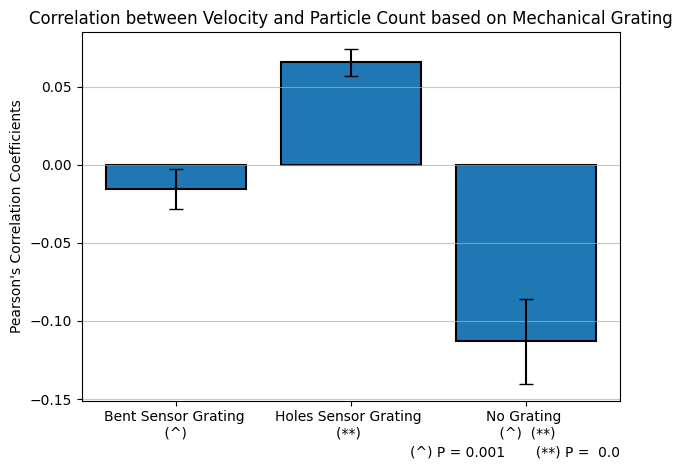

In [113]:

GrillTypes = ["Bent", "Holes", "Control"]
dataType1 = 'RelativeHumidity'
dataType2 = 'PM25'

BentData = data[data["Grille"] == GrillTypes[0]]
HoleData = data[data["Grille"] == GrillTypes[1]]
ControlData = data[data["Grille"] == GrillTypes[2]]

selectionDataSet = findCorr(BentData, dataType1, dataType2)

from scipy.stats import pearsonr
import numpy as np
from scipy.stats import norm

# Assuming you have var1, var2 as arrays, and a binary array/grating_indicator indicating the presence of the grating
# Split your data based on the grating presence
BentPM = BentData["PM25"]
BentVel = BentData["velocity_m_h"]

HolePM = HoleData["PM25"]
HoleVel = HoleData["velocity_m_h"]

ConPM = ControlData["PM25"]
ConVel = ControlData["velocity_m_h"]

# Calculate correlation coefficients
corr_with_BentGrating, _ = pearsonr(BentPM, BentVel) #Pearson's Correlation Coefficients 
corr_with_HoleGrating, _ = pearsonr(HolePM, HoleVel)
corr_without_grating, _ = pearsonr(ConPM, ConVel)

z_with_BentGrating = np.arctanh(corr_with_BentGrating)
z_with_HoleGrating = np.arctanh(corr_with_HoleGrating)
z_without_grating = np.arctanh(corr_without_grating)

# Standard errors
se_with_BentGrating = 1 / np.sqrt(len(BentPM) - 3)
se_with_HoleGrating = 1 / np.sqrt(len(HolePM) - 3)
se_without_grating = 1 / np.sqrt(len(ConPM) - 3)

# Standard error of the difference
se_diffBent = np.sqrt(se_with_BentGrating**2 + se_without_grating**2)
se_diffHole = np.sqrt(se_with_HoleGrating**2 + se_without_grating**2)

# Z-score for the difference
z_bent = (z_with_BentGrating - z_without_grating) / se_diffBent
z_hole = (se_with_HoleGrating - z_without_grating) / se_diffHole

# P-value
p_value_bent = 2 * (1 - norm.cdf(np.abs(z_bent)))  # Two-tailed test
p_value_hole = 2 * (1 - norm.cdf(np.abs(z_hole)))  # Two-tailed test

print(f"Bent Z-score: {z_bent:.4f}")
print(f"P-value: {p_value_bent:.4f}")
print(f"Hole Z-score: {z_hole:.4f}")
print(f"P-value: {p_value_hole:.4f}")



### Full Plots with All Gratings 

In [ ]:
samples = ["Bent Sensor Grating \n (^) ", "Holes Sensor Grating \n(**) ", "No Grating \n (^)  (**)" ]
corr_coeffs = [corr_with_BentGrating,corr_with_HoleGrating,corr_without_grating]
std_errors = [se_with_BentGrating, se_with_HoleGrating, se_without_grating]  # Standard errors for error bars
p_values = [p_value_bent, p_value_hole, 100]  # Standard errors for error bars

bar_colors = ['tab:blue', 'tab:blue', 'tab:blue']

fig, ax = plt.subplots()
ax.grid(True, which='major', axis='y', linestyle='-', alpha=0.7)  # Add gridlines for easier comparison
ax.bar(samples, corr_coeffs,  color=bar_colors,  edgecolor='black', linewidth=1.5)

# Adding error bars
x_positions = range(len(samples))  # X positions for the error bars
ax.errorbar(x_positions, corr_coeffs, yerr=std_errors, fmt='none', capsize=5, color='black')

ax.set_ylabel("Pearson's Correlation Coefficients")
ax.set_title("Correlation between Velocity and Particle Count based on Mechanical Grating")
ax.set_xlabel("(^) P = "+ str(round(p_values[0],3)) + "       (**) P =  "+ str(round(p_values[1],3)), loc = "right")

plt.tight_layout()  # Adjust layout to make room for everything
plt.show()

In [97]:
 str(round(p_values[1],4))

'0.0'

### Two Grating Solution

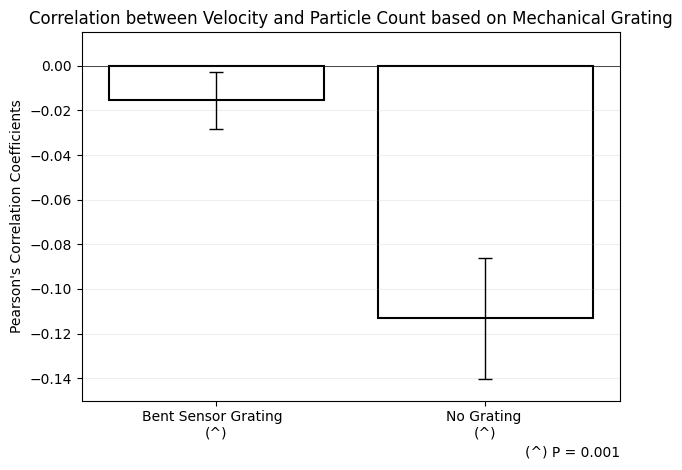

In [112]:
samples = ["Bent Sensor Grating  \n(^)", "No Grating \n(^)" ]
corr_coeffs = [corr_with_BentGrating,corr_without_grating]
std_errors = [se_with_BentGrating,  se_without_grating]  # Standard errors for error bars
p_values = [p_value_bent, 100]  # Standard errors for error bars

bar_colors = ['white',  'white']

fig, ax = plt.subplots()
ax.grid(True, which='major', axis='y', linestyle='-', alpha=0.2)  # Add gridlines for easier comparison
ax.bar(samples, corr_coeffs,  color=bar_colors,  edgecolor='black', linewidth=1.5)

# Adding error bars
x_positions = range(len(samples))  # X positions for the error bars
ax.errorbar(x_positions, corr_coeffs, yerr=std_errors, fmt='none', capsize=5, color='black', lw = 1)

plt.yticks(fontsize=10)
ax.plot([-1,3], [0,0], color = "black", lw = 0.5)
ax.set_xlabel("(^) P = 0.001", loc = 'right')
ax.set_ylabel("Pearson's Correlation Coefficients")


ax.set_title("Correlation between Velocity and Particle Count based on Mechanical Grating")

# ax.legend(title='Mechanical Grating Design')
plt.ylim(-0.15, 0.015)
plt.xlim(-0.5, 1.5)

plt.tight_layout()  # Adjust layout to make room for everything
plt.show()

# Segmenting between High + Low Signal Data Sets [Depricated]

In [81]:

 
# LargeDataSizeCatagories MediumDataSizeCatagories NumUniqueDataPoints CorrelationCoeff	Coef Abs GrilleType
# FullCorrData
typeCorrel =["CorrelationCoeff" , "CorrelationCoeff_VelPM25",	"CorrelationCoeff_RelHumidPM25", "CorrelationCoeff_TempPM25"]
SignalCatagories = ["SignalTwoBucket",	"SignalThreeBucket"]
file_path = 'DataLake.csv'
data = pd.read_csv(file_path, header=0)

SignalTypes = ["High Signal", "High Signal ", "Low Signal ", "Low Signal"]
SignalShort = ["High", "Medium", "Low"]
GrillTypes = ["Bent", "Holes", "Control"]

# data_HighSignal = data[data[SignalCatagories[0]].isin(SignalTypes[0:2])]
# data_HighBentSignal = data_HighSignal[data_HighSignal["GrilleType"].isin([GrillTypes[0]])]
# data_HighHolesSignal = data_HighSignal[data_HighSignal["GrilleType"].isin([GrillTypes[1]])]
# data_HighControlSignal = data_HighSignal[data_HighSignal["GrilleType"].isin([GrillTypes[2]])]

# data_LowSignal = data[data["LargeDataSizeCatagories"].isin(SignalTypes[2:4])]
# data_LowBentSignal = data_LowSignal[data_LowSignal["GrilleType"].isin([GrillTypes[0]])]
# data_LowHolesSignal = data_LowSignal[data_LowSignal["GrilleType"].isin([GrillTypes[1]])]
# data_LowControlSignal = data_LowSignal[data_LowSignal["GrilleType"].isin([GrillTypes[2]])]
# data_LowSignal = data[data["LargeDataSizeCatagories"].isin(SignalTypes[2:4])]

# data_BentSignal = data[data["GrilleType"].isin([GrillTypes[0]])]
# data_HolesSignal = data[data["GrilleType"].isin([GrillTypes[1]])]
# data_ControlSignal = data[data["GrilleType"].isin([GrillTypes[2]])]

# Corr_data_HighSignal = weightedAverage(data_HighSignal, typeCorrel[1])
# Corr_data_HighBentSignal = weightedAverage(data_HighBentSignal, typeCorrel[1])
# Corr_data_HighHolesSignal = weightedAverage(data_HighHolesSignal, typeCorrel[1])
# Corr_data_HighControlSignal = weightedAverage(data_HighControlSignal, typeCorrel[1])

# Corr_data_LowSignal = weightedAverage(data_LowSignal, typeCorrel[1])
# Corr_data_LowBentSignal = weightedAverage(data_LowBentSignal,  typeCorrel[1])
# Corr_data_LowHolesSignal = weightedAverage(data_LowHolesSignal,  typeCorrel[1])
# # Corr_data_LowControlSignal = weightedAverage(data_LowControlSignal)

# Corr = weightedAverage(data)
# Corr_data_BentSignal = weightedAverage(data_BentSignal,  typeCorrel[1])
# Corr_data_HolesSignal = weightedAverage(data_HolesSignal,  typeCorrel[1])
# Corr_data_ControlSignal = weightedAverage(data_ControlSignal,  typeCorrel[1])

